<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px; margin-bottom:10px;">
  <h2 style="color:#36454F;">
    <b style="letter-spacing: 3px; font-size: 10px; font-family: 'Arial', sans-serif;">CASE STUDY REFERENCE CODING MATERIAL</b><br>
     <strong style="font-family: 'Times New Roman', Times, serif;">Govardhan Ecovillage: Leveraging Consumer Analytics for S3 Impact Alignment</strong>
  </h2>
  <h5 style="color:#36454F;font-size: 15px; font-family: 'Arial', sans-serif;">
    <b style="font-size: 12px;letter-spacing: 3px;">BY SHEKHAR SHUKLA AND VARTUL SHRIVASTAVA</b><br>
    <em style="font-family: 'Times New Roman', Times, serif;">Supplementary iPYNB notebook to address the analysis and the preprocessing of the GEV reviews</em>
  </h5>
</div>


<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F;font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>1. Importing Essential Libraries</b><br>
  </h5>
<i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
  To import CSV files into dataframes, we used the Pandas library. For conducting sentiment analysis and topic modeling on the data, preprocessing is necessary. Therefore, we imported several libraries: from NLTK, we imported stopwords and word_tokenize; from the string library, we imported text manipulation functions. Additionally, we used Gensim's LDA model and Coherence Model, and for visualizing the LDA model, we utilized the pyLDAvis library. To create graphs, we employed Seaborn and Matplotlib. Finally, for generating word clouds from the review texts, we used the WordCloud library.
</i>

</div>


In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import string
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F;font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>2. Downloading NLTK Requirements for Data Preprocessing</b><br>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    To effectively preprocess and analyze text data, we downloaded several resources from the NLTK library. The <code>punkt</code> tokenizer is essential for splitting text into sentences and words. The <code>stopwords</code> list helps filter out common words that are typically not meaningful for analysis. The <code>averaged_perceptron_tagger</code> is used for part-of-speech tagging, which assigns word types such as nouns, verbs, and adjectives. Lastly, the <code>vader_lexicon</code> is particularly useful for sentiment analysis, providing a lexicon specifically designed for gauging sentiment in social media texts.
  </i>
</div>


In [3]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>3. Importing and Preprocessing Translated Reviews for Sentiment Analysis</b><br>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet demonstrates how to import a CSV file containing translated reviews into a Pandas DataFrame and preprocess the text data for sentiment analysis. The steps are as follows:<br>
    1. <b>Import the translated reviews CSV file as a Pandas DataFrame:</b>
    The CSV file 'translated_GV.csv' is read into a DataFrame. Unnecessary columns 'date' and 'review' are dropped.<br>
    2. <b>Define stop words:</b>
    A set of stop words is created by combining English stop words from the NLTK library and punctuation characters from the string library.<br>
    3. <b>Add custom stopwords for adjectives that don't add significant value:</b>
    Custom stop words are defined to exclude common adjectives and irrelevant words such as 'beautiful', 'excellent', 'govardhan', and 'service'.<br>
    4. <b>Preprocess text to extract adjectives:</b>
    A function is defined to tokenize the text, convert it to lowercase, and extract adjectives using part-of-speech tagging. This function ensures that only meaningful adjectives are retained, excluding those present in the stop words and custom stop words lists.<br>
    5. <b>Update the DataFrame with extracted adjectives:</b>
    The DataFrame is updated with a new column containing the extracted adjectives for each review.<br>
    6. <b>Combine all extracted adjectives into a single list:</b>
    All extracted adjectives are combined into a single list.<br>
    7. <b>Create a dictionary representation of the documents:</b>
    Using the Gensim library, a dictionary representation of the documents is created. The dictionary is filtered to remove extremely rare and overly common words, keeping a manageable number of terms.<br>
    8. <b>Create a corpus representing each document as a bag-of-words:</b>
    A corpus is created, representing each document as a bag-of-words using the filtered dictionary. This is essential for further analysis such as topic modeling.<br>
  </i>
</div>


In [4]:
# Importing the translated reviews CSV file as a Pandas DataFrame
df = pd.read_csv('gev-translated-reviews.csv')
df.drop(columns=['date','review'], inplace=True)

# Define stop words
stop_words = set(stopwords.words('english') + list(string.punctuation))

# Add custom stopwords for adjectives that don't add significant value
custom_stopwords = {'beautiful', 'excellent', 'good', 'amazing', 'nice', 'awesome', 'great', 'wonderful', 'like', 'u', 'you', 'govardhan', 'place', 'service'}

# Preprocess text to extract adjectives
def preprocess_text(text):
    tokens = word_tokenize(str(text).lower())
    pos_tags = pos_tag(tokens)
    adjectives = [word for word, pos in pos_tags if pos == 'JJ' and word not in stop_words and word not in custom_stopwords]
    return adjectives

df['adjectives'] = df['translated_review'].apply(preprocess_text)

# Combine all adjectives into a single list
all_tokens = df['adjectives'].tolist()
all_tokens_flat = [item for sublist in all_tokens for item in sublist]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(all_tokens)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(adjectives) for adjectives in df['adjectives']]

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>4. Analyzing Sentiment in Reviews</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet employs sentiment analysis to assess the sentiment of reviews. Using the SentimentIntensityAnalyzer from the NLTK library, each review's sentiment score is calculated based on its textual content. The sentiment score is then categorized as positive, negative, or neutral depending on its value. Finally, the distribution of sentiments across the reviews dataset is displayed to provide insight into the prevailing sentiments among the reviews.
  </i>
</div>


In [5]:
analyzer = SentimentIntensityAnalyzer()

df["sentiment_score"] = [analyzer.polarity_scores(str(text))["compound"] for (text) in df["translated_review"]]

df["sentiment"] = df["sentiment_score"].apply(
    lambda x: "positive" if x > 0.05 else ("negative" if x < -0.05 else "neutral")
)

df['sentiment'].value_counts()

sentiment
positive    1060
neutral       81
negative      34
Name: count, dtype: int64

In [20]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import math

# Ensure you have the necessary NLTK resources
nltk.download('vader_lexicon')
nltk.download('punkt')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# The input sentence
text = "The experience at Govardhan Ecovillage was truly uplifting. The serene surroundings and eco-friendly practices make it a haven for nature lovers. The accommodation is improved as well"

# Tokenize the text into individual words
words = nltk.word_tokenize(text)

# Function to calculate and print the compound score step-by-step
def calculate_compound_score(words):
    print("Word-level Sentiment Analysis:")
    valence_scores = []

    # Calculate the sentiment of each word and store the compound score
    for word in words:
        sentiment = sid.polarity_scores(word)
        valence_scores.append(sentiment['compound'])
        if sentiment['compound'] != 0:
            print(f"Word: '{word}', Sentiment: {sentiment}")

    # Calculate the sum of valence scores
    sum_valence = sum(valence_scores)
    print(f"\nSum of valence scores: {sum_valence}")

    # Normalize the sum of valence scores
    compound_score = sum_valence / math.sqrt((sum_valence**2) + 15)
    print(f"Numerator: {sum_valence}")
    print(f"Denominator: {math.sqrt((sum_valence**2) + 15)}")
    print(f"Normalized compound score: {compound_score}")

    return compound_score

# Perform the calculation and print the compound score
overall_compound_score = calculate_compound_score(words)
print(f"\nOverall Compound Score: {overall_compound_score}")

# For comparison, also print the VADER compound score for the entire sentence
overall_sentiment = sid.polarity_scores(text)
print(f"\nVADER Compound Score for the entire sentence: {overall_sentiment['compound']}")


Word-level Sentiment Analysis:
Word: 'truly', Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4404}
Word: 'serene', Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}
Word: 'lovers', Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267}
Word: 'improved', Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4767}
Word: 'well', Sentiment: {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.2732}

Sum of valence scores: 2.1757999999999997
Numerator: 2.1757999999999997
Denominator: 4.442308593513062
Normalized compound score: 0.48979037682731885

Overall Compound Score: 0.48979037682731885

VADER Compound Score for the entire sentence: 0.926


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Vartul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
<b>5. Donut Chart - Visualizing Sentiment Distribution</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet preprocesses and visualizes the distribution of sentiments in the reviews dataset. The sentiment categories are aggregated and their percentages are calculated. The distribution is then presented as a donut chart, providing a clear visualization of the proportions of positive, negative, and neutral sentiments. Additionally, a central circle is added to transform the pie chart into a donut chart for improved aesthetics.
  </i>
</div>


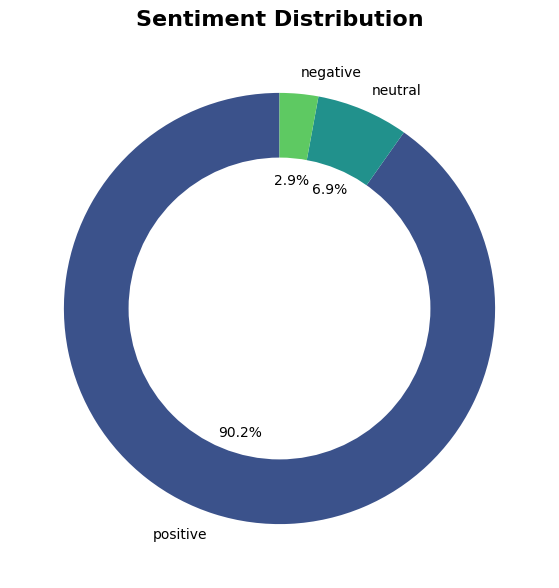

In [7]:
# Preprocess the data
df['sentiment'] = df['sentiment'].astype('category')

# Aggregate the data and calculate percentages
sentiment_counts = df['sentiment'].value_counts()
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Plot sentiment distribution as a donut chart
plt.figure(figsize=(10, 7))
colors = sns.color_palette('viridis', len(sentiment_percentages))
plt.pie(sentiment_percentages, labels=sentiment_percentages.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.4))

# Add a central circle to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add title
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold', pad=10)

# Show the plot
plt.show()


<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
   <b>6. Bar Chart - Visualizing Sentiment Distribution</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet preprocesses and visualizes the distribution of sentiments in the reviews dataset. The sentiment categories are aggregated, and the distribution is presented as a horizontal bar plot using seaborn. The frequency of each sentiment category is displayed on the y-axis, providing a clear comparison between positive, negative, and neutral sentiments. Additionally, the x-axis scale is transformed to a logarithmic scale to accommodate a wide range of frequencies and improve readability.
  </i>
</div>


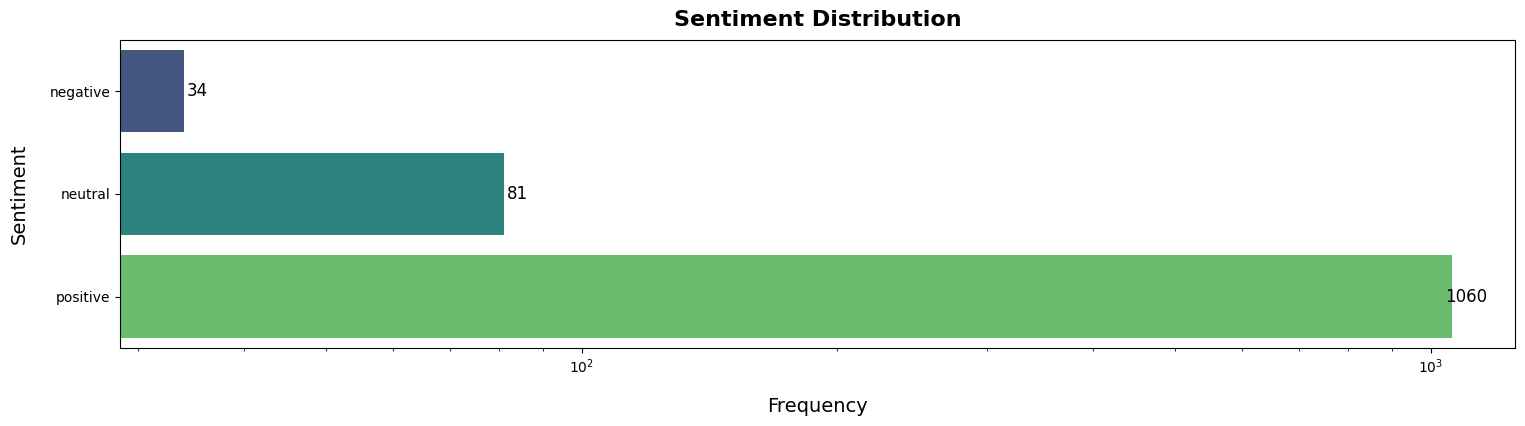

In [8]:
# Preprocess the data
df['sentiment'] = df['sentiment'].astype('category')

# Aggregate the data
sentiment_counts = df['sentiment'].value_counts()

# Plot sentiment distribution using seaborn
plt.figure(figsize=(18, 4))
barplot = sns.barplot(y=sentiment_counts.index, x=sentiment_counts.values, palette='viridis', orient='h')

# Add titles and labels
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold', pad=10)
plt.ylabel('Sentiment', fontsize=14, labelpad=15)
plt.xlabel('Frequency', fontsize=14, labelpad=15)
plt.xscale('log')

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.0f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha = 'center', va = 'center', 
                     xytext = (10, 0), 
                     textcoords = 'offset points', fontsize=12)

# Show the plot
plt.show()

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>7. Visualizing Word Clouds (+/-/~) for Sentiment Analysis</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code tokenizes the reviews and generates word clouds to visualize the sentiment of the text data. The reviews are classified into positive, negative, and neutral words based on their sentiment scores calculated using the SentimentIntensityAnalyzer. Word clouds are then created for each sentiment category, providing a graphical representation of the most frequent words associated with each sentiment. The word clouds offer an intuitive way to identify the prevalent sentiments and key themes within the reviews dataset.
  </i>
</div>


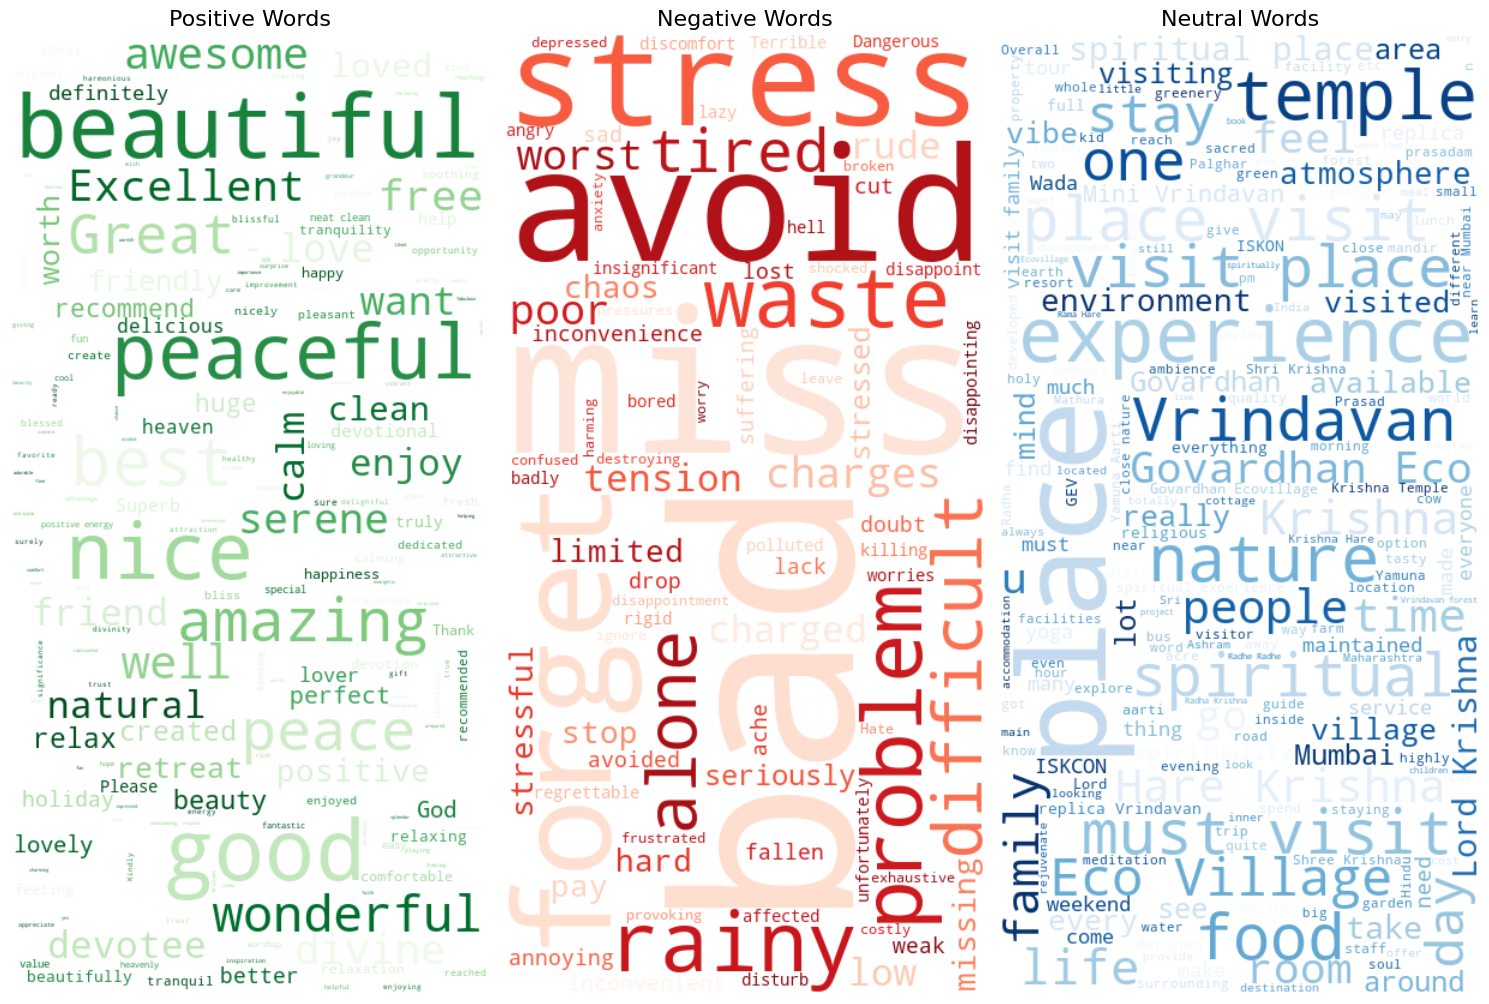

In [9]:

# Tokenize the reviews
stop_words = set(stopwords.words('english'))
sid = SentimentIntensityAnalyzer()

positive_words = []
negative_words = []
neutral_words = []

# Function to classify and append words to respective lists
def classify_words(text):
    words = word_tokenize(str(text))
    for word in words:
        if word.lower() not in stop_words and word.isalpha():  # Remove stopwords and non-alphabetical tokens
            sentiment = sid.polarity_scores(word)['compound']
            if sentiment > 0.05:
                positive_words.append(word)
            elif sentiment < -0.05:
                negative_words.append(word)
            else:
                neutral_words.append(word)

# Apply the function to the 'translated_review' column
df['translated_review'].apply(classify_words)

# Create word cloud strings
positive_text = ' '.join(positive_words)
negative_text = ' '.join(negative_words)
neutral_text = ' '.join(neutral_words)

# Generate word clouds
positive_wordcloud = WordCloud(width=400, height=800, background_color='white', colormap='Greens').generate(positive_text)
negative_wordcloud = WordCloud(width=400, height=800, background_color='white', colormap='Reds').generate(negative_text)
neutral_wordcloud = WordCloud(width=400, height=800, background_color='white', colormap='Blues').generate(neutral_text)

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 10))

# Display the positive word cloud
axs[0].imshow(positive_wordcloud, interpolation='bilinear')
axs[0].set_title('Positive Words', fontsize=16)
axs[0].axis('off')

# Display the negative word cloud
axs[1].imshow(negative_wordcloud, interpolation='bilinear')
axs[1].set_title('Negative Words', fontsize=16)
axs[1].axis('off')

# Display the neutral word cloud
axs[2].imshow(neutral_wordcloud, interpolation='bilinear')
axs[2].set_title('Neutral Words', fontsize=16)
axs[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>8. Computing Coherence Scores and Extracting Dominant Topics for Reviews</b><br>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet explains the process of computing coherence scores for different topic models and extracting the dominant topics from reviews. The steps are as follows:<br>
    1. <b>Define a function to compute coherence values:</b>
    The <code>compute_coherence_values</code> function iterates over a range of topic numbers, creating LDA models and computing their coherence values to evaluate the model quality.<br>
    2. <b>Compute coherence values for a range of number of topics:</b>
    The function is called with a specified range for the number of topics, and it returns a list of models and their coherence values.<br>
    3. <b>Select the model with the highest coherence value:</b>
    The model with the highest coherence score is identified as the optimal model for the data.<br>
    4. <b>Define a function to get the dominant topic for each review:</b>
    The <code>get_dominant_topic</code> function calculates the dominant topic for each review by finding the topic with the highest probability.<br>
    5. <b>Calculate the dominant topic for each review:</b>
    The DataFrame is updated with a new column containing the dominant topic for each review.<br>
    6. <b>Extract top keywords for each topic:</b>
    The top keywords for each topic are extracted from the optimal model to understand the main themes.<br>
    7. <b>Define a function to create a title from top keywords:</b>
    The <code>create_title</code> function generates a title for each topic by joining the top three keywords.<br>
    8. <b>Generate titles for each topic:</b>
    Titles are created for each topic based on their top keywords.<br>
    9. <b>Map the dominant topic to its title:</b>
    The DataFrame is updated with a new column containing the title of the dominant topic for each review, providing a summary of the main theme of each review.<br>
  </i>
</div>


In [10]:
# Function to compute coherence score
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, chunksize=2000, passes=20, iterations=400, eval_every=None)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Compute coherence values for a range of number of topics
start = 3
limit = 18
step = 1
model_list, coherence_values = compute_coherence_values(dictionary, corpus, df['adjectives'], limit, start, step)

# Select the model with the highest coherence value
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]

# Function to get the dominant topic for each review
def get_dominant_topic(review):
    bow = dictionary.doc2bow(review)
    topic_dist = optimal_model.get_document_topics(bow, minimum_probability=0)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    return dominant_topic

# Calculate the dominant topic for each review
df['dominant_topic'] = df['adjectives'].apply(get_dominant_topic)

# Extract top keywords for each topic
top_keywords_per_topic = []
num_topics = optimal_model.num_topics
for i in range(num_topics):
    top_keywords = optimal_model.show_topic(i, topn=10)
    top_keywords_per_topic.append([word for word, _ in top_keywords])

# Function to create a title from top keywords
def create_title(keywords):
    return ' '.join(keywords[:3])

# Generate titles for each topic
topic_titles = [create_title(keywords) for keywords in top_keywords_per_topic]

# Map the dominant topic to its title
df['topic_title'] = df['dominant_topic'].apply(lambda x: topic_titles[x])

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <b>9. Visualizing Coherence Scores for Topic Models</b><br>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code visualizes the coherence scores for various topic models to determine the optimal number of topics. A line plot displays coherence scores against the number of topics, highlighting the maximum coherence score for easier identification. Additionally, a heatmap provides a tabular representation of the coherence scores for each topic count, offering a clear and detailed view of the data.
  </i>
</div>


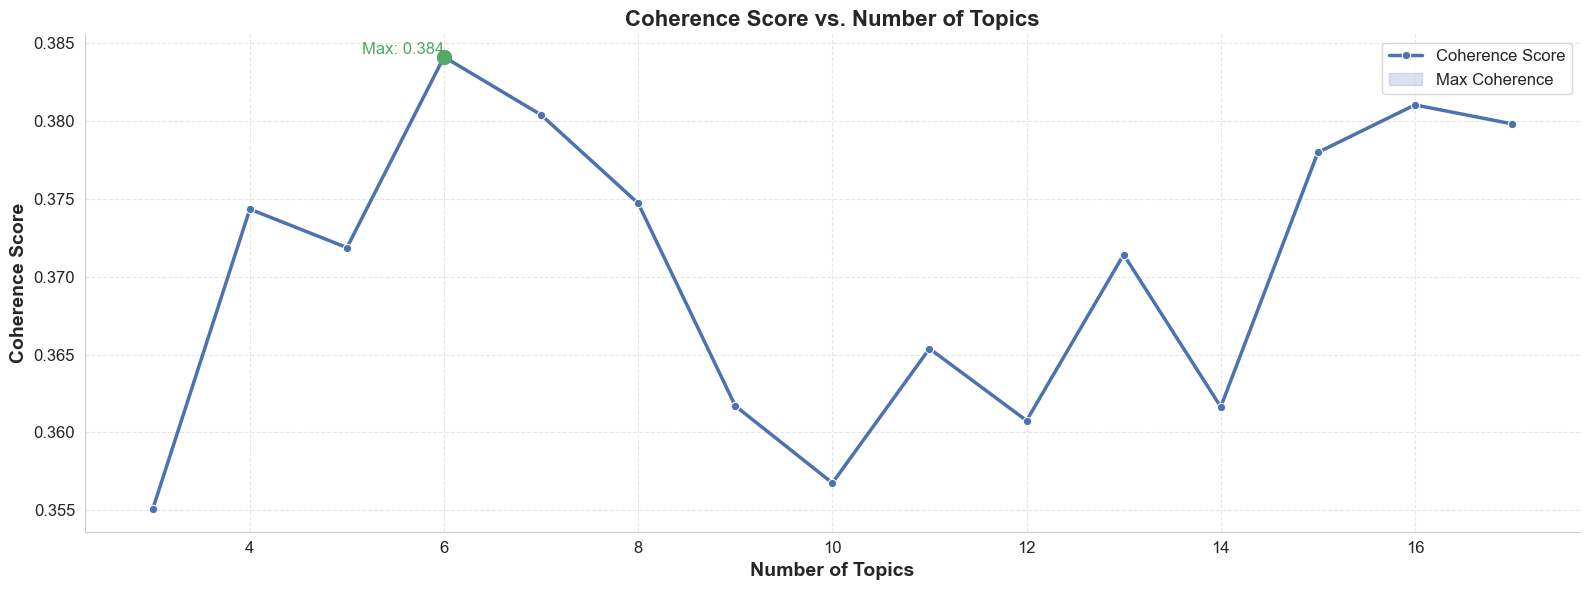

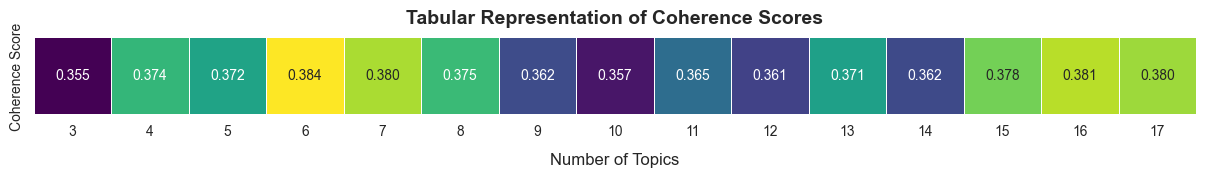

In [11]:
# Show coherence score graph
x = range(start, limit, step)

# Create a DataFrame for tabular representation
tmp = pd.DataFrame({'Number of Topics': x, 'Coherence Score': coherence_values})

# Set Seaborn style
sns.set_style("whitegrid")

# Plot sentiment distribution as a line plot
plt.figure(figsize=(16, 6))
sns.lineplot(x=x, y=coherence_values, marker='o', color='#4C72B0', linewidth=2.5)
max_coherence_index = coherence_values.index(max(coherence_values))
plt.scatter(x[max_coherence_index], coherence_values[max_coherence_index], color='#55A868', s=100, zorder=5)
plt.text(x[max_coherence_index], coherence_values[max_coherence_index], 
         f'Max: {max(coherence_values):.3f}', fontsize=12, ha='right', va='bottom', color='#55A868')

# Customize the labels and title
plt.xlabel("Number of Topics", fontsize=14, fontweight='bold')
plt.ylabel("Coherence Score", fontsize=14, fontweight='bold')
plt.title("Coherence Score vs. Number of Topics", fontsize=16, fontweight='bold')

# Customize the ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
plt.legend(['Coherence Score', 'Max Coherence'], fontsize=12)

# Improve layout and aesthetics
plt.tight_layout()
sns.despine()

# Show the plot
plt.show()

# Create a heatmap to display the tabular data
plt.figure(figsize=(15, 1))
heatmap = sns.heatmap(tmp.set_index('Number of Topics').T, annot=True, cmap='viridis', cbar=False, fmt='.3f', linewidths=0.5)

# Customize the heatmap
plt.title("Tabular Representation of Coherence Scores", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Number of Topics", fontsize=12, labelpad=10)
plt.ylabel("", fontsize=12, labelpad=10)

# Show the heatmap
plt.show()


<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
 <b>10. Preparing and Displaying the Visualization for the Optimal LDA Model</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code prepares and displays the visualization for the optimal Latent Dirichlet Allocation (LDA) model. First, the visualization data is prepared using the <code>gensimvis.prepare</code> function, which takes the optimal model, corpus, and dictionary as inputs. The prepared visualization is then saved as an HTML file named 'optimal_lda_topics.html'. Finally, the visualization is displayed using <code>pyLDAvis.display</code>.
  </i>
</div>


In [12]:
# Prepare the visualization for the optimal model
vis = gensimvis.prepare(optimal_model, corpus, dictionary)
pyLDAvis.save_html(vis, 'optimal_lda_topics.html')

# Display the visualization
pyLDAvis.display(vis)

<div style="background: white; border:1px solid #dcdcdc; padding:25px; border-radius:10px;">
  <h5 style="color:#36454F; font-size: 15px; font-family: 'Arial', sans-serif;">
    <img src="https://img.icons8.com/ios-glyphs/30/000000/bar-chart.png" style="vertical-align: middle;"/> 
    <b>11. Visualizing Topic Distribution in Reviews using Pie Chart and Horizontal Bar Plot</b>
  </h5>
  <i style="font-family: 'Times New Roman', Times, serif; font-size: 14px; text-align: justify; text-justify: inter-word;">
    This code snippet visualizes the distribution of topics within the reviews dataset. The number of reviews assigned to each topic is represented using a bar plot, providing insight into the frequency of different topics across the dataset. Additionally, a pie chart displays the proportion of reviews for each topic as a percentage of the total number of reviews, offering a concise overview of the topic distribution.
  </i>
</div>


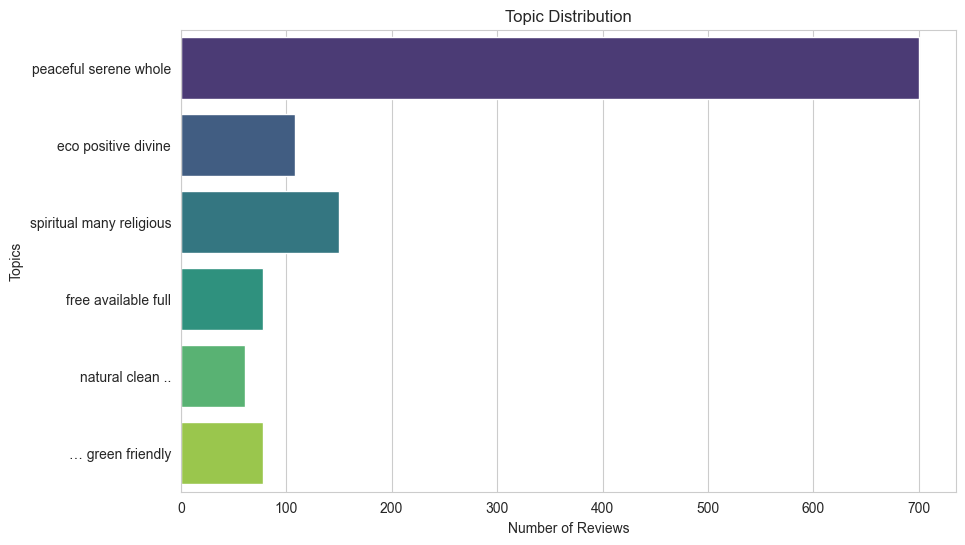

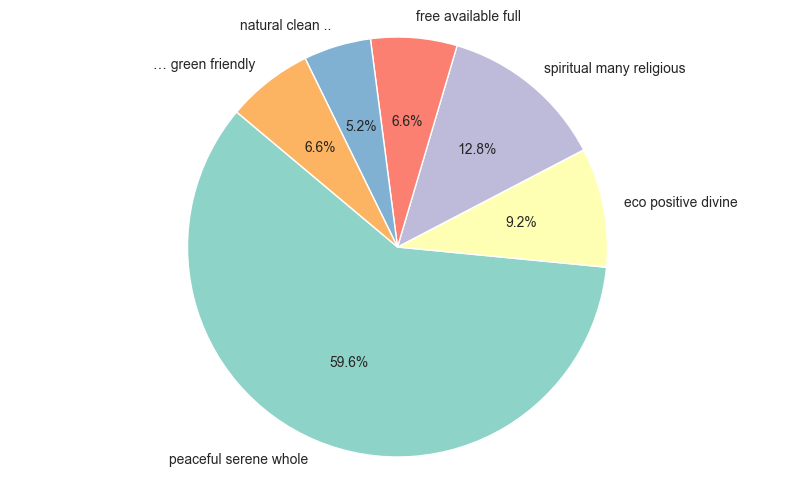

In [13]:
topic_counts = df['dominant_topic'].value_counts().sort_index()
topic_titles = [create_title(top_keywords_per_topic[i]) for i in range(len(top_keywords_per_topic))]

# Create a separate DataFrame for visualization
topic_distribution = pd.DataFrame({
    'Topic': topic_titles,
    'Count': topic_counts
})

plt.figure(figsize=(10, 6))
sns.barplot(data=topic_distribution, x='Count', y='Topic', palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Topics')
plt.show()

# Calculate percentages
topic_distribution['Percentage'] = (topic_distribution['Count'] / topic_distribution['Count'].sum()) * 100

# Plot the pie chart using seaborn
plt.figure(figsize=(10, 6))
sns.set_palette("Set3")
plt.pie(topic_distribution['Percentage'], labels=topic_distribution['Topic'], autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [14]:
!pip freeze > requirements.txt